In [ ]:
import random
import time
import numpy as np
rng = np.random.default_rng()
import math
import sys
from numpy import linalg as LA
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/kaggle/input/chi-filter-kuhar-1500/chi-filter_kuhar_1500.csv')

In [ ]:
# Getting first 3 rows from df
train_df = df.head(10905)

# Printing df_first_3
train_df


,552,793,837,988,1024,1025,1027,1033,1037,1041,...,3322,3323,3324,3325,3463,3529,5081,5124,5601,class
0,549.83650,1754.80150,0.0000,2063.19560,32166.455,0.0000,24738.160,57354.680,0.0,3737.7932,...,140688.060,547.50635,6091.1157,7072.385,0.00000,0.0000,0.000000,0.00000,147.15137,1
1,337.08453,1758.85380,0.0000,2260.65160,30582.389,0.0000,35051.562,60880.880,0.0,0.0000,...,140016.300,1103.66850,322.5998,14872.237,7100.08940,2365.8943,0.000000,179.15158,0.00000,1
2,287.83650,1738.31100,0.0000,2274.44070,29889.229,0.0000,36302.900,61163.727,0.0,0.0000,...,143214.470,1113.56500,0.0000,14684.511,6278.72850,1767.8855,0.000000,0.00000,0.00000,1
3,411.20367,1841.05830,0.0000,2349.94210,30273.994,0.0000,34053.074,60152.130,0.0,0.0000,...,143339.440,774.00440,2384.7703,12062.933,7035.36870,2363.2900,0.000000,187.97780,0.00000,1
4,377.50348,1807.56910,0.0000,2298.91100,29792.412,0.0000,36499.273,61531.188,0.0,0.0000,...,140514.310,0.00000,1711.9835,13706.190,6476.32500,1816.5537,0.000000,0.00000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,3118.88670,652.47880,2276.2720,185.65034,27418.414,0.0000,16635.105,45404.555,0.0,3379.9749,...,87729.940,0.00000,9588.0625,0.000,479.55945,0.0000,493.072970,1187.48400,0.00000,18
10901,5271.42700,0.00000,3693.8154,197.76582,23830.582,0.0000,44206.470,67210.490,0.0,0.0000,...,69640.140,0.00000,18481.6640,0.000,0.00000,0.0000,0.000000,1426.27930,360.89056,18
10902,3382.52250,0.00000,2137.5620,133.19014,23754.863,0.0000,24016.941,49621.640,0.0,2142.9163,...,58226.477,0.00000,3857.0574,0.000,1050.19730,0.0000,0.000000,1827.13730,614.29425,18
10903,2355.49070,47.11456,811.9790,479.79220,9978.536,2042.9556,45568.860,63036.363,0.0,0.0000,...,32897.277,3182.64900,17262.1150,1879.206,3173.80370,0.0000,422.348700,512.78640,0.00000,18


In [ ]:
#train_df = pd.read_csv('/kaggle/input/chi-best-1000-kuhar/chi-filter.csv')
#test_df = pd.read_csv('/kaggle/input/merged-features-img90/merged_X_feature_img90_test.csv')
#Y_train = pd.read_csv('/kaggle/input/y-classified-train-test/Y.csv')
#Y_test = pd.read_csv('/kaggle/input/y-classified-train-test/Y_test.csv')
Y_train=train_df["class"]
# converting column without decimal to integer
for col in train_df.columns:
    if np.sum((train_df[col] - train_df[col].astype('int'))) == 0:
        train_df[col] = train_df[col].astype('int')

#for col in test_df.columns:
    #if np.sum((test_df[col] - test_df[col].astype('int'))) == 0:
        #test_df[col] = test_df[col].astype('int')

/tmp/ipykernel_30/3547063760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].astype('int')
/tmp/ipykernel_30/3547063760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].astype('int')
/tmp/ipykernel_30/3547063760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
train_df.head()

,552,793,837,988,1024,1025,1027,1033,1037,1041,...,3322,3323,3324,3325,3463,3529,5081,5124,5601,class
0,549.83650,1754.8015,0.0,2063.1956,32166.455,0.0,24738.160,57354.680,0.0,3737.7932,...,140688.06,547.50635,6091.1157,7072.385,0.0000,0.0000,0.0,0.00000,147.15137,1
1,337.08453,1758.8538,0.0,2260.6516,30582.389,0.0,35051.562,60880.880,0.0,0.0000,...,140016.30,1103.66850,322.5998,14872.237,7100.0894,2365.8943,0.0,179.15158,0.00000,1
2,287.83650,1738.3110,0.0,2274.4407,29889.229,0.0,36302.900,61163.727,0.0,0.0000,...,143214.47,1113.56500,0.0000,14684.511,6278.7285,1767.8855,0.0,0.00000,0.00000,1
3,411.20367,1841.0583,0.0,2349.9421,30273.994,0.0,34053.074,60152.130,0.0,0.0000,...,143339.44,774.00440,2384.7703,12062.933,7035.3687,2363.2900,0.0,187.97780,0.00000,1
4,377.50348,1807.5691,0.0,2298.9110,29792.412,0.0,36499.273,61531.188,0.0,0.0000,...,140514.31,0.00000,1711.9835,13706.190,6476.3250,1816.5537,0.0,0.00000,0.00000,1


In [ ]:
Y_train.shape

(10905,)

In [ ]:
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 10905;  Number of columns: 1501; No of missing values: 0


In [ ]:
train_df=train_df.drop(['class' ], axis=1)

In [ ]:
train_df.head()

,552,793,837,988,1024,1025,1027,1033,1037,1041,...,3321,3322,3323,3324,3325,3463,3529,5081,5124,5601
0,549.83650,1754.8015,0.0,2063.1956,32166.455,0.0,24738.160,57354.680,0.0,3737.7932,...,28757.480,140688.06,547.50635,6091.1157,7072.385,0.0000,0.0000,0.0,0.00000,147.15137
1,337.08453,1758.8538,0.0,2260.6516,30582.389,0.0,35051.562,60880.880,0.0,0.0000,...,26468.062,140016.30,1103.66850,322.5998,14872.237,7100.0894,2365.8943,0.0,179.15158,0.00000
2,287.83650,1738.3110,0.0,2274.4407,29889.229,0.0,36302.900,61163.727,0.0,0.0000,...,25898.586,143214.47,1113.56500,0.0000,14684.511,6278.7285,1767.8855,0.0,0.00000,0.00000
3,411.20367,1841.0583,0.0,2349.9421,30273.994,0.0,34053.074,60152.130,0.0,0.0000,...,25603.799,143339.44,774.00440,2384.7703,12062.933,7035.3687,2363.2900,0.0,187.97780,0.00000
4,377.50348,1807.5691,0.0,2298.9110,29792.412,0.0,36499.273,61531.188,0.0,0.0000,...,27027.572,140514.31,0.00000,1711.9835,13706.190,6476.3250,1816.5537,0.0,0.00000,0.00000


In [ ]:
best_col1000 = list(train_df.columns)

In [ ]:

res = [eval(i) for i in best_col1000]
print("Modified list is: ", len(res))

Modified list is:  1500


In [ ]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
X_train = train_df.to_numpy()
y_train = Y_train.to_numpy()

In [ ]:
feat_list=list(train_df.keys())
len(feat_list)

1500

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import xgboost as xg


# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.svm import SVC

In [ ]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d]  = 1
            else:
                Xbin[i,d]  = 0

    return Xbin

In [ ]:
# error rate
def error_rate(xtrain, ytrain, x):
    # parameters
    xt, xv, yt, yv = train_test_split(xtrain, ytrain, test_size=0.25, shuffle=True)
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    x_train = xt[:, x == 1]
    y_train = yt.reshape(num_train)
    x_valid = xv[:, x == 1]
    y_valid = yv.reshape(num_valid)
    # Training
    #mdl     = LinearRegression()
    #mdl.fit(xtrain, ytrain)
    #X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = 0.25)
    clf = LinearRegression()
    clf.fit(x_train, y_train)
    #accuracy = clf.score(xv,yv)

    #print('Accuracy: ',accuracy)
    # Prediction
    ypred   = clf.predict(x_valid)
    error   = mean_squared_error(y_valid, ypred, squared=False)
    print(error)
    return error

In [ ]:
def fun(x, xtrain, ytrain):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    thres = 0.5
    # original feature size
    max_feat = np.size(xtrain, 1)
    print(max_feat)

    # Number of selected features
    num_feat = np.sum(x == 1)
    print(num_feat)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x)
        # Objective function
        cost = alpha * (1-error) + beta * (num_feat / max_feat)
        print(cost)
    return cost

# This function is to initialize the Honey Badger population.
def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random()*(ub[j] - lb[j]) + lb[j]
    return X

# Calculate fitness values for each Honey Badger.
def CaculateFitness1(X,fun, X_train, y_train):
    fitness = fun(X, X_train, y_train)
    print(fitness)
    return fitness

# Sort fitness.
def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness,index


# Sort the position of the Honey Badger according to fitness.
def SortPosition(X,index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i,:] = X[index[i],:]
    return Xnew


# Boundary detection function.
def BorderCheck1(X,lb,ub,dim):
        for j in range(dim):
            if X[j]<lb[j]:
                X[j] = ub[j]
            elif X[j]>ub[j]:
                X[j] = lb[j]
        return X
def Intensity(pop,GbestPositon,X):
  epsilon = 0.00000000000000022204
  di = np.zeros(pop)
  S = np.zeros(pop)
  I = np.zeros(pop)
  for j in range(pop):
    if (j <= pop):
      di[j]=LA.norm([[X[j,:]-GbestPositon+epsilon]])
      S[j]= LA.norm([X[j,:]-X[j+1,:]+epsilon])
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)
    else:
      di[j]=[ LA.norm[[X[pop,:]-GbestPositon+epsilon]]]
      S[j]=[LA.norm[[X[pop,:]-X[1,:]+epsilon]]]
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)

    for i in range(pop):
      n = random.random()
      I[i] = n*S[i]/[4*math.pi*di[i]]
    return I

In [ ]:
def hba(pop,dim,lb,ub,Max_iter,fun, X_train, y_train):
    X = initial(pop, dim, lb,ub)                    # Initialize the number of honey badgers
    fitness = np.zeros([pop, 1])
    for i in range(pop):
      print("Calculate fitness Iteration:", i + 1)
      # Binary conversion
      Xbin = binary_conversion(X, 0.5, pop, dim)
      fitness[i] = CaculateFitness1(Xbin[i, :], fun, X_train, y_train)
    fitness, sortIndex = SortFitness(fitness)       # Sort the fitness values of honey badger.
    X = SortPosition(X, sortIndex)                  # Sort the honey badger.
    GbestScore = fitness[0]                         # The optimal value for the current iteration.
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([Max_iter, 1])
    C = 2                                          # constant in Eq. (3)
    beta = 6                                       # the ability of HB to get the food  Eq.(4)
    vec_flag=[1,-1]
    vec_flag=np.array(vec_flag)
    Xnew = np.zeros([pop, dim])
    for t in range(Max_iter):
        print("Digging and honey phase, iteration: ",t+1)
        alpha=C*math.exp(-t/Max_iter);             # density factor in Eq. (3)
        I=Intensity(pop,GbestPositon,X);           # intensity in Eq. (2)
        Vs=random.random()
        for i in range(pop):
          print("Population, iteration: ",i+1)
          Vs=random.random()
          F=vec_flag[math.floor((2*random.random()))]
          for j in range(dim):
            di=GbestPositon[0,j]-X[i,j]
            if (Vs <0.5):                           # Digging phase Eq. (4)
              r3=np.random.random()
              r4=np.random.randn()
              r5=np.random.randn()
              Xnew[i,j]=GbestPositon[0,j] +F*beta*I[i]* GbestPositon[0,j]+F*r3*alpha*(di)*np.abs(math.cos(2*math.pi*r4)*(1-math.cos(2*math.pi*r5)));
            else:
              r7=random.random()
              Xnew[i,j]=GbestPositon[0,j]+F*r7*alpha*di;    # Honey phase Eq. (6)
          #print(di)
          Xnew[i,:] = BorderCheck1(Xnew[i,:], lb, ub, dim)
          tempFitness = CaculateFitness1(Xnew[i,:], fun, X_train, y_train)
          if (tempFitness <= fitness[i]):
            fitness[i] = tempFitness
            X[i,:] = Xnew[i,:]
        for i in range(pop):
          X[i,:] = BorderCheck1(X[i,:], lb, ub ,dim)
        Ybest,index = SortFitness(fitness)               # Sort fitness values.
        if (Ybest[0] <= GbestScore):
          GbestScore = Ybest[0]     # Update the global optimal solution.
          GbestPositon[0, :] = X[index[0], :]           # Sort fitness values
        Curve[t] = GbestScore
    return GbestScore,GbestPositon,Curve


In [ ]:
rng = np.random.default_rng()
time_start = time.time()
pop = 20                    # Honey Badger population size.
MaxIter = 300               # Maximum number of iterations.
dim = np.size(xtrain, 1)                    # The dimension.
fl=-1                    # The lower bound of the search interval.
ul=1                      # The upper bound of the search interval.
lb = fl*np.ones([dim, 1])
ub = ul*np.ones([dim, 1])
GbestScore, GbestPositon, Curve = hba(pop, dim, lb, ub, MaxIter, fun,X_train, y_train )
time_end = time.time()
print(f"The running time is: {time_end  - time_start } s")
print('The optimal value：',GbestScore)
print('The optimal solution：',GbestPositon)


Calculate fitness Iteration: 1
1500
357
1.7056946516340885
-0.6962577051177475
-0.6962577051177475
Calculate fitness Iteration: 2
1500
379
1.6957003463438352
-0.6862166762137302
-0.6862166762137302
Calculate fitness Iteration: 3
1500
402
1.7319277663256023
-0.7219284886623463
-0.7219284886623463
Calculate fitness Iteration: 4
1500
419
1.7992968498592263
-0.7885105480273007
-0.7885105480273007
Calculate fitness Iteration: 5
1500
393
1.7146936497357597
-0.7049267132384021
-0.7049267132384021
Calculate fitness Iteration: 6
1500
401
1.744247950413087
-0.7341321375756228
-0.7341321375756228
Calculate fitness Iteration: 7
1500
356
1.8104936514293624
-0.8000153815817354
-0.8000153815817354
Calculate fitness Iteration: 8
1500
370
1.7239540687435857
-0.7142478613894833
-0.7142478613894833
Calculate fitness Iteration: 9
1500
376
1.787140700512119
-0.776762626840331
-0.776762626840331
Calculate fitness Iteration: 10
1500
351
1.8345376265293067
-0.8238522502640137
-0.8238522502640137
Calculate fit

In [ ]:
GbestPositon.shape

(1, 1500)

In [ ]:
Sel_feat = np.zeros([1, 1500], dtype='int')
for i in range(1):
        for d in range(1500):
            if GbestPositon[i,d] > 0.2:
                Sel_feat[i,d] = 1
            else:
                Sel_feat[i,d] = 0

In [ ]:
si=Sel_feat.flatten()

In [ ]:
si.shape

(1500,)

In [ ]:
ind=np.argwhere(si)

In [ ]:
selind=ind.flatten()

In [ ]:
s_ind=list(selind)

In [ ]:
X_train.shape

(10905, 1500)

In [ ]:
Xtr= X_train[:, s_ind]

In [ ]:
Xtr.shape

(10905, 602)

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(Xtr, y_train, test_size=0.20, shuffle=True)
mdl2 = SVC(kernel='linear')
mdl2.fit(x_tr, y_tr)
ac2 = mdl2.score(x_te,y_te)
print(ac2)

0.8404401650618982


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
target_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']
y_pre = mdl2.predict(x_te)
print(classification_report(y_te, y_pre, target_names=target_names))

              precision    recall  f1-score   support

           1       0.61      0.68      0.65       205
           2       0.65      0.64      0.64       190
           3       0.78      0.80      0.79       165
           4       0.93      0.93      0.93       211
           5       0.94      0.96      0.95       252
           6       0.75      0.65      0.69       165
           7       0.91      0.96      0.93       202
           8       0.91      0.91      0.91       128
           9       0.95      0.99      0.97        81
          10       0.98      0.89      0.93        47
          11       0.96      0.89      0.92       105
          12       0.87      0.87      0.87        90
          13       0.78      0.89      0.83        28
          14       0.72      0.64      0.68        36
          15       0.98      0.95      0.97        64
          16       0.88      0.89      0.88        79
          17       0.91      0.83      0.87        82
          18       0.90    

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# convert array into dataframe
best_feat_X_tr = pd.DataFrame(Xtr)
best_feat_Y_tr = pd.DataFrame(y_train)

# save the dataframe as a csv file
best_feat_X_tr.to_csv("ku_har_best_feat_X_train602.csv")
best_feat_Y_tr.to_csv("ku_har_best_feat_Y_train602.csv")


In [ ]:
# convert array into dataframe
best_feat_X_te = pd.DataFrame(x_te)
best_feat_Y_te = pd.DataFrame(y_te)

# save the dataframe as a csv file
best_feat_X_te.to_csv("ku_har_best_feat_X_test602.csv")
best_feat_Y_te.to_csv("ku_har_best_feat_Y_test602.csv")

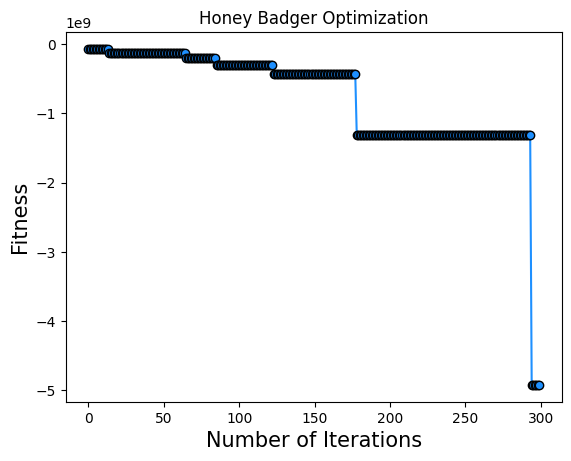

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot( Curve,color='dodgerblue', marker='o', markeredgecolor='k', markerfacecolor='dodgerblue')

ax.set_xlabel('Number of Iterations',fontsize=15)
ax.set_ylabel('Fitness',fontsize=15)
ax.set_title('Honey Badger Optimization')
plt.show()


